,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138
...,...,...,...,...
2006,1.17255,1.17255,1.16848,1.16952
2007,1.16940,1.17032,1.16682,1.16826
2008,1.16825,1.16901,1.15894,1.15969
2009,1.15963,1.16097,1.15626,1.15769


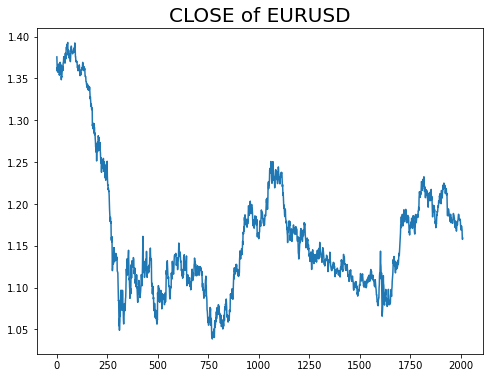

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 

dataset = pd.read_csv('/content/drive/MyDrive/hw04/EURUSD_Daily_20140101_20211001.csv', usecols=[0,1,2,3,4])

cols = list(['OPEN','HIGH','LOW','CLOSE'])

dataset = pd.DataFrame(dataset, columns=cols)


dataset.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD", fontsize=20)

dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#ignoring warnings
import warnings
warnings.simplefilter('ignore')

#importing neccesary modules
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import sklearn.externals
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost
from xgboost import XGBRegressor, DMatrix

In [ ]:
#python package version information
print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('MatlpotLib version:{}'.format(matplotlib.__version__))
print('Seaborn version:{}'.format(sns.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__))
print('XGBoost version:{}'.format(xgboost.__version__))

Python version:3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Numpy version:1.19.5
Pandas version:1.1.5
MatlpotLib version:3.2.2
Seaborn version:0.11.2
Sci-Kit Learn version:1.0.1
XGBoost version:0.90


In [ ]:
dataset.head()

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138


In [ ]:
dataset.isna().sum()

OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64

No handles with labels found to put in legend.


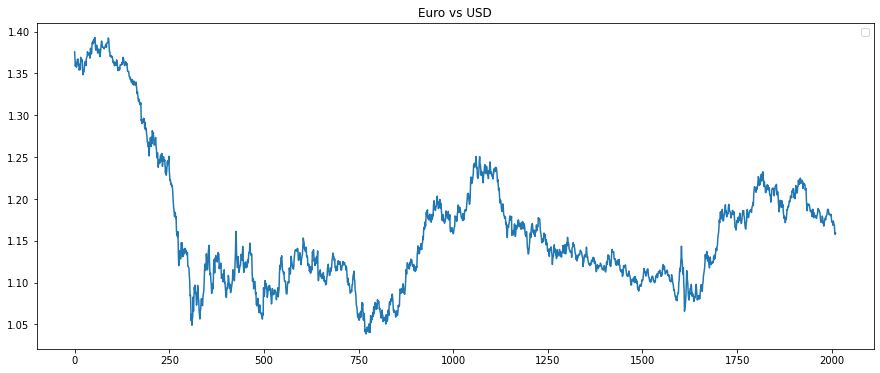

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dataset.CLOSE)
plt.title('Euro vs USD')
plt.legend()
plt.show()

ابتدا داده ها را از ورودی میگیریم 

در این بخش هر دو حالت با نرمالسازی و بدون نرمالسازی نتایج را نشان میدهیم و میبینیم که با نرمالسازی بسیار نتایج بهتر میشود 

در اینجا ما سه حالت نرمالسازی کردیم ولی در این دیتا ست میبینیم که روش بهتر برای این دیتا ست کدام است 

از ما خواسته شده داده ها را به صورت متوالی در بیاوریم و لیبل روز بعد را انتخاب کنیم در اینجا 5 روز در نظر گرفتیم و مقدار بسته شدن روز بعد را در نظر گرفته ایم

برای اینکار از حلقه فور استفاده میکنیم 

و بعد داده های اموزشی و ازمایشی را تعیین میکنیم و به ورودی شبکه های بازگشتی می دهیم 

In [ ]:
dataset.head(10)

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138
5,1.36142,1.36349,1.35533,1.35749
6,1.35746,1.36328,1.35484,1.36017
7,1.36016,1.36871,1.35721,1.36665
8,1.36662,1.36846,1.36373,1.36680
9,1.36680,1.36992,1.36490,1.36722


In [ ]:
x=[]
y=[]
for i in range (len(dataset)-5):
    x.append(dataset.iloc[i:i+5,])
    y.append(dataset.CLOSE[i+5]) 

In [ ]:
x[0]

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138


In [ ]:
y[0]

1.3574899999999999

In [ ]:
len(x)

2006

In [ ]:
len(dataset)

2011

In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.03,shuffle=False)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=16, return_sequences=False))
#model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
1945/1945 [==============================] - 22s 6ms/step - loss: 0.0102
Epoch 2/20
1945/1945 [==============================] - 11s 5ms/step - loss: 2.1507e-04
Epoch 3/20
1945/1945 [==============================] - 11s 5ms/step - loss: 2.3649e-04
Epoch 4/20
1945/1945 [==============================] - 11s 6ms/step - loss: 2.5453e-04
Epoch 5/20
1945/1945 [==============================] - 11s 6ms/step - loss: 2.5647e-04
Epoch 6/20
1945/1945 [==============================] - 11s 6ms/step - loss: 2.6513e-04
Epoch 7/20
1945/1945 [==============================] - 11s 6ms/step - loss: 2.7275e-04
Epoch 8/20
1945/1945 [==============================] - 11s 5ms/step - loss: 2.7748e-04
Epoch 9/20
1945/1945 [==============================] - 11s 6ms/step - loss: 2.8168e-04
Epoch 10/20
1945/1945 [==============================] - 12s 6ms/step - loss: 2.8590e-04
Epoch 11/20
1945/1945 [==============================] - 11s 5ms/step - loss: 2.8773e-04
Epoch 12/20
1945/1945 [===========

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.007
MAE: 0.006
R^2: -0.056


In [ ]:
#print("test", y_test)


In [ ]:
#print("predicted", predictions_lstm)

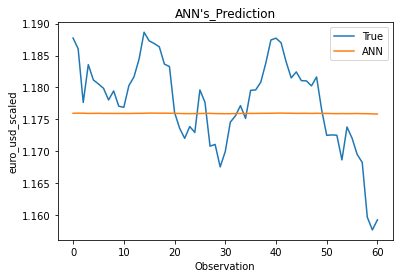

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_train)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_train, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_train, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_train, predictions_lstm)))

RMSE: 0.081
MAE: 0.064
R^2: -0.023


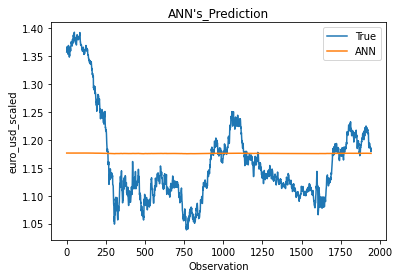

In [ ]:
plt.plot(y_train, label='True')
plt.plot(predictions_lstm, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [10]:
#ignoring warnings
import warnings
warnings.simplefilter('ignore')

#importing neccesary modules
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost
from xgboost import XGBRegressor, DMatrix

In [130]:
dataset

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138
...,...,...,...,...
2006,1.17255,1.17255,1.16848,1.16952
2007,1.16940,1.17032,1.16682,1.16826
2008,1.16825,1.16901,1.15894,1.15969
2009,1.15963,1.16097,1.15626,1.15769


در این جا تاثیر نرمالسازی را تست میکنیم و میبینیم که اگه نرمالسازی شود نیازی به یک شبکه بسیار پیچیده نیست

در اینجا سه معیار ارزیابی را تست کردیم 

RMSE: هر چه کمتر بهتر 

MAE: هر چه کمتر بهتر 

R^2: در این فاکتور هر چه به یک نزدیکتر باشد بهتر است

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data = sc.fit_transform(dataset)
data.shape

(2011, 4)

In [ ]:
data

array([[0.95053302, 0.9361244 , 0.95188016, 0.95135028],
       [0.9514073 , 0.93894902, 0.92180875, 0.92490899],
       [0.92495347, 0.91005957, 0.90861415, 0.90320851],
       ...,
       [0.36603869, 0.35590234, 0.35273934, 0.34150746],
       [0.34172824, 0.33341723, 0.34526333, 0.33586365],
       [0.33543911, 0.33280197, 0.34537492, 0.34032226]])

In [ ]:
x=[]
y=[]
for i in range (len(data)-5):
    x.append(data[i:i+5,])
    y.append(data[i+5,3]) 

In [ ]:
x[0]

array([[0.95053302, 0.9361244 , 0.95188016, 0.95135028],
       [0.9514073 , 0.93894902, 0.92180875, 0.92490899],
       [0.92495347, 0.91005957, 0.90861415, 0.90320851],
       [0.90555023, 0.90480186, 0.90557353, 0.91618929],
       [0.91623893, 0.90575272, 0.912659  , 0.91065835]])

In [ ]:
y[0]

0.8996811242486662

In [ ]:
x,y = np.array(x),np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=False)

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=16, return_sequences=False))
#model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 13s 6ms/step - loss: 0.0067
Epoch 2/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0017
Epoch 3/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0023
Epoch 4/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0029
Epoch 5/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0035
Epoch 6/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0043
Epoch 7/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0059
Epoch 8/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0052
Epoch 9/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0047
Epoch 10/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0031
Epoch 11/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0025
Epoch 12/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0017

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.083
MAE: 0.075
R^2: 0.487


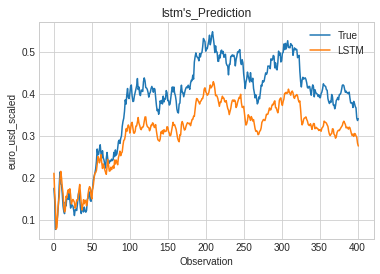

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.13))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 17s 6ms/step - loss: 0.0047
Epoch 2/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0021
Epoch 3/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0028
Epoch 4/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0034
Epoch 5/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0036
Epoch 6/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0036
Epoch 7/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0028
Epoch 8/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0028
Epoch 9/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0024
Epoch 10/20
1604/1604 [==============================] - 12s 7ms/step - loss: 0.0018
Epoch 11/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0026
Epoch 12/20
1604/1604 [==============================] - 10s 6ms/step - lo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.084
MAE: 0.077
R^2: 0.465


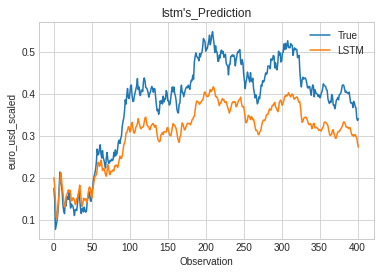

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(1024, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=512, return_sequences=False))
#model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 29s 14ms/step - loss: 0.0027
Epoch 2/20
1604/1604 [==============================] - 22s 13ms/step - loss: 0.0022
Epoch 3/20
1604/1604 [==============================] - 24s 15ms/step - loss: 0.0030
Epoch 4/20
1604/1604 [==============================] - 23s 14ms/step - loss: 0.0052
Epoch 5/20
1604/1604 [==============================] - 22s 13ms/step - loss: 0.0045
Epoch 6/20
1604/1604 [==============================] - 22s 13ms/step - loss: 0.0023
Epoch 7/20
1604/1604 [==============================] - 22s 13ms/step - loss: 0.0040
Epoch 8/20
1604/1604 [==============================] - 21s 13ms/step - loss: 0.0047
Epoch 9/20
1604/1604 [==============================] - 22s 13ms/step - loss: 0.0056
Epoch 10/20
1604/1604 [==============================] - 22s 14ms/step - loss: 0.0059
Epoch 11/20
1604/1604 [==============================] - 22s 14ms/step - loss: 0.0055
Epoch 12/20
1604/1604 [==============================] - 21s 13

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.207
MAE: 0.189
R^2: -2.229


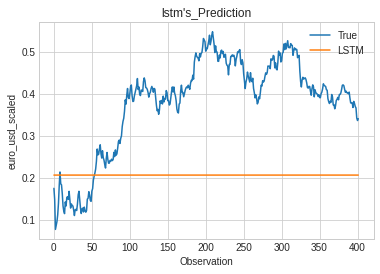

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(8, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=4, return_sequences=False))
#model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 18s 6ms/step - loss: 0.0228
Epoch 2/20
1604/1604 [==============================] - 12s 7ms/step - loss: 0.0018
Epoch 3/20
1604/1604 [==============================] - 14s 9ms/step - loss: 0.0017
Epoch 4/20
1604/1604 [==============================] - 14s 9ms/step - loss: 0.0019
Epoch 5/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0022
Epoch 6/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0026
Epoch 7/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0034
Epoch 8/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0032
Epoch 9/20
1604/1604 [==============================] - 9s 6ms/step - loss: 0.0031
Epoch 10/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0027
Epoch 11/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0023
Epoch 12/20
1604/1604 [==============================] - 10s 6ms/step - loss

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.076
MAE: 0.069
R^2: 0.568


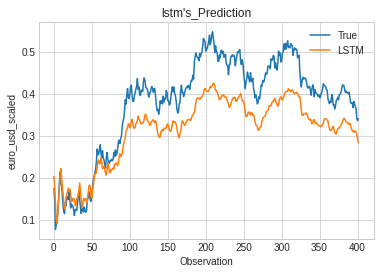

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(8, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=4, return_sequences=True))
#model.add(Dropout(0.01))
model.add(LSTM(units=2, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 28s 10ms/step - loss: 0.0125
Epoch 2/20
1604/1604 [==============================] - 15s 10ms/step - loss: 0.0025
Epoch 3/20
1604/1604 [==============================] - 20s 12ms/step - loss: 0.0030
Epoch 4/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0041
Epoch 5/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0066
Epoch 6/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0056
Epoch 7/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0050
Epoch 8/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0042
Epoch 9/20
1604/1604 [==============================] - 13s 8ms/step - loss: 0.0031
Epoch 10/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0034
Epoch 11/20
1604/1604 [==============================] - 12s 8ms/step - loss: 0.0024
Epoch 12/20
1604/1604 [==============================] - 12s 8ms/step -

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.085
MAE: 0.079
R^2: 0.455


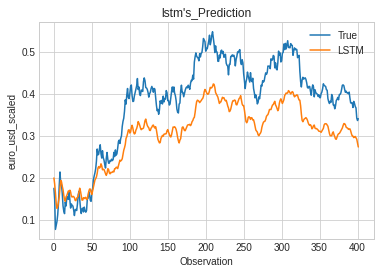

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, shuffle=False)

Epoch 1/20
51/51 [==============================] - 10s 12ms/step - loss: 0.0889
Epoch 2/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0299
Epoch 3/20
51/51 [==============================] - 1s 10ms/step - loss: 0.0220
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 5/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0148
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 7/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 8/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 9/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 10/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 12/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 13/20
51/51 [==========================

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.032
MAE: 0.026
R^2: 0.923


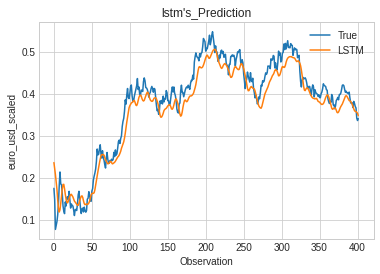

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.7))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.7))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, shuffle=False)

Epoch 1/20
51/51 [==============================] - 55s 7ms/step - loss: 0.1003
Epoch 2/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0460
Epoch 3/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0353
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0308
Epoch 5/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0270
Epoch 6/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 7/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 8/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 9/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 10/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0202
Epoch 11/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 12/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 13/20
51/51 [=============================

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.039
MAE: 0.033
R^2: 0.884


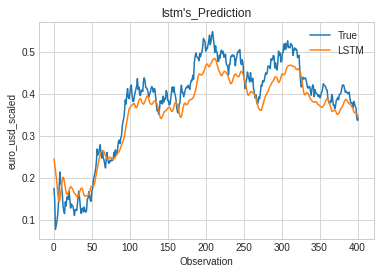

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1, shuffle=False)

Epoch 1/20
1604/1604 [==============================] - 17s 6ms/step - loss: 0.0215
Epoch 2/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0091
Epoch 3/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0071
Epoch 4/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0074
Epoch 5/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0068
Epoch 6/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0066
Epoch 7/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0065
Epoch 8/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0060
Epoch 9/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0063
Epoch 10/20
1604/1604 [==============================] - 10s 6ms/step - loss: 0.0059
Epoch 11/20
1604/1604 [==============================] - 10s 7ms/step - loss: 0.0058
Epoch 12/20
1604/1604 [==============================] - 10s 6ms/step - lo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.114
MAE: 0.104
R^2: 0.025


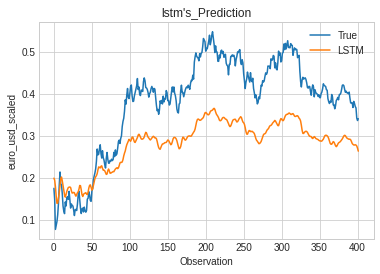

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, shuffle=False)

Epoch 1/20
13/13 [==============================] - 10s 11ms/step - loss: 0.1416
Epoch 2/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0706
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0434
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0329
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0284
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0246
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0231
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 9/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 10/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 11/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 12/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 13/20
13/13 [========================

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.034
MAE: 0.028
R^2: 0.912


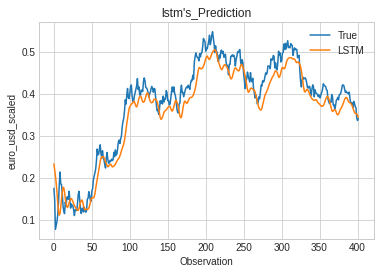

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [ ]:
history = model.fit(x_train, y_train, epochs=40, shuffle=False)

Epoch 1/40
51/51 [==============================] - 1s 11ms/step - loss: 0.0071
Epoch 2/40
51/51 [==============================] - 1s 12ms/step - loss: 0.0070
Epoch 3/40
51/51 [==============================] - 1s 11ms/step - loss: 0.0063
Epoch 4/40
51/51 [==============================] - 1s 11ms/step - loss: 0.0064
Epoch 5/40
51/51 [==============================] - 1s 13ms/step - loss: 0.0073
Epoch 6/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 7/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 8/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 9/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 10/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 12/40
51/51 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 13/40
51/51 [=========================

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.031
MAE: 0.025
R^2: 0.928


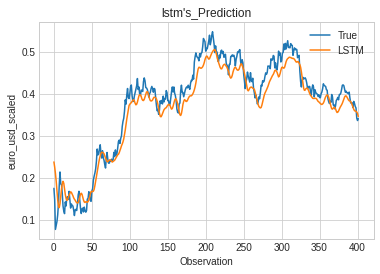

In [ ]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

پس از تنظیم پارامتر ها بهترین مدل را سیو میکنیم 


In [ ]:
model.save("/content/drive/MyDrive/hw04/TrainedModel0.h5")

در این قسمت فاکتور 

lookback window

را تست میکنیم و میبینیم که مقدار را بهبود میبخشد و هر چه شبکه پیچیده تر مقدار بالاتری باید باشد و هر چه مقدار کمتر خروجی بهتری میدهد

ما همچنین می توانیم این مسئله را طوری بیان کنیم که از مراحل زمانی اخیر برای پیش بینی مرحله زمانی بعدی استفاده کرد.

این روش را پنجره می نامند و اندازه پنجره پارامتری است که می تواند در هر مسئله تغییر کند.

در اینجا با تغییر اندازه پنجره سعی در پیدا کردن بهترین اندازه هستیم که پارامتر های ارزیابی را بهبود دهد

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138
...,...,...,...,...
2006,1.17255,1.17255,1.16848,1.16952
2007,1.16940,1.17032,1.16682,1.16826
2008,1.16825,1.16901,1.15894,1.15969
2009,1.15963,1.16097,1.15626,1.15769


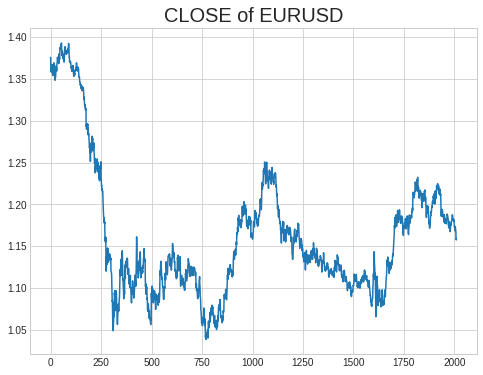

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 

dataset = pd.read_csv('/content/drive/MyDrive/hw04/EURUSD_Daily_20140101_20211001.csv', usecols=[0,1,2,3,4])

cols = list(['OPEN','HIGH','LOW','CLOSE'])

dataset = pd.DataFrame(dataset, columns=cols)


dataset.CLOSE.plot(figsize=(8, 6),)
plt.title("CLOSE of EURUSD", fontsize=20)

dataset

In [13]:
dataset.head()

,OPEN,HIGH,LOW,CLOSE
0,1.37550,1.37648,1.37372,1.37580
1,1.37581,1.37749,1.36294,1.36643
2,1.36643,1.36716,1.35821,1.35874
3,1.35955,1.36528,1.35712,1.36334
4,1.36334,1.36562,1.35966,1.36138


No handles with labels found to put in legend.


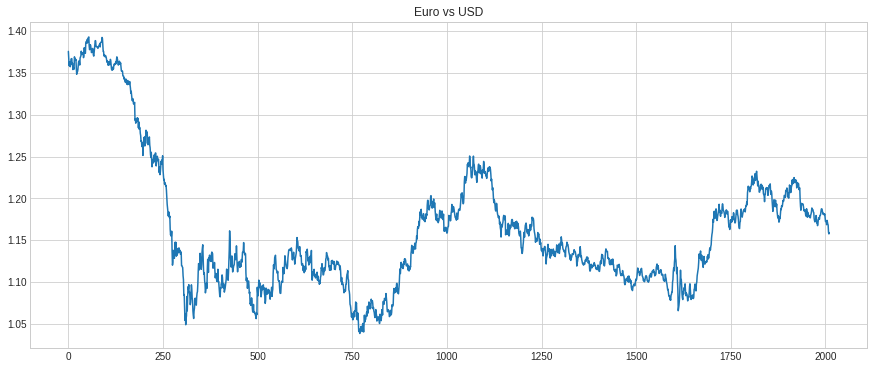

In [14]:
plt.figure(figsize=(15,6))
plt.plot(dataset.CLOSE)
plt.title('Euro vs USD')
plt.legend()
plt.show()

In [131]:
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
data = sc.fit_transform(dataset)
data.shape

(2011, 4)

In [110]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)


In [112]:

# split into train and test sets
train_size = int(len(data) * 0.80)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]



In [113]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [116]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)


Epoch 1/5
1606/1606 - 10s - loss: 0.0311 - 10s/epoch - 7ms/step
Epoch 2/5
1606/1606 - 7s - loss: 0.0085 - 7s/epoch - 4ms/step
Epoch 3/5
1606/1606 - 7s - loss: 0.0062 - 7s/epoch - 4ms/step
Epoch 4/5
1606/1606 - 7s - loss: 0.0060 - 7s/epoch - 4ms/step
Epoch 5/5
1606/1606 - 7s - loss: 0.0059 - 7s/epoch - 5ms/step


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(testX)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(testY, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(testY, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(testY, predictions_lstm)))

RMSE: 0.020
MAE: 0.014
R^2: 0.971


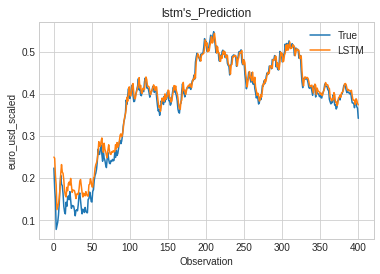

In [119]:
plt.plot(testY, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [121]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [122]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1605/1605 - 11s - loss: 0.0283 - 11s/epoch - 7ms/step
Epoch 2/5
1605/1605 - 7s - loss: 0.0087 - 7s/epoch - 4ms/step
Epoch 3/5
1605/1605 - 7s - loss: 0.0070 - 7s/epoch - 4ms/step
Epoch 4/5
1605/1605 - 7s - loss: 0.0059 - 7s/epoch - 4ms/step
Epoch 5/5
1605/1605 - 7s - loss: 0.0062 - 7s/epoch - 4ms/step


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(testX)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(testY, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(testY, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(testY, predictions_lstm)))

RMSE: 0.021
MAE: 0.017
R^2: 0.968


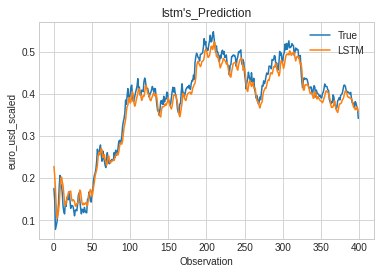

In [124]:
plt.plot(testY, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

In [125]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [126]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1602/1602 - 10s - loss: 0.0247 - 10s/epoch - 7ms/step
Epoch 2/5
1602/1602 - 7s - loss: 0.0089 - 7s/epoch - 4ms/step
Epoch 3/5
1602/1602 - 7s - loss: 0.0064 - 7s/epoch - 4ms/step
Epoch 4/5
1602/1602 - 7s - loss: 0.0052 - 7s/epoch - 4ms/step
Epoch 5/5
1602/1602 - 7s - loss: 0.0062 - 7s/epoch - 4ms/step


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(testX)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(testY, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(testY, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(testY, predictions_lstm)))

RMSE: 0.028
MAE: 0.023
R^2: 0.938


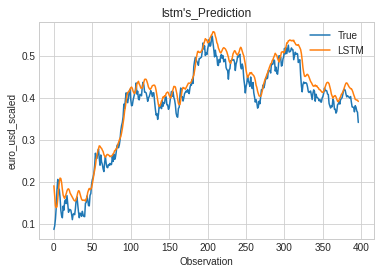

In [128]:
plt.plot(testY, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

در این قسمت از ما خواسته شده مقدار  روز بعد را به جای روز بعد پیش بینی کنیم و پارامتر را برای کمترین خطا محاسبه کنیم 

In [133]:
x=[]
y=[]
for i in range (len(data)-10):
    x.append(data[i:i+5,])
    y.append(data[i+10,3]) 

In [134]:
x,y = np.array(x),np.array(y)

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=False)

In [136]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.13))
model.add(LSTM(units=16, return_sequences=False))
#model.add(Dropout(0.01))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [138]:
history = model.fit(x_train, y_train, epochs=5, batch_size=1, shuffle=False)

Epoch 1/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 2/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0031
Epoch 3/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0040
Epoch 4/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0050
Epoch 5/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.0060


In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.200
MAE: 0.183
R^2: -2.031


In [140]:
model = Sequential()
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mean_squared_error")
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1600/1600 - 11s - loss: 0.0170 - 11s/epoch - 7ms/step
Epoch 2/5
1600/1600 - 7s - loss: 0.0077 - 7s/epoch - 5ms/step
Epoch 3/5
1600/1600 - 7s - loss: 0.0077 - 7s/epoch - 5ms/step
Epoch 4/5
1600/1600 - 7s - loss: 0.0070 - 7s/epoch - 5ms/step
Epoch 5/5
1600/1600 - 7s - loss: 0.0073 - 7s/epoch - 5ms/step


In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_lstm = model.predict(x_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))

RMSE: 0.040
MAE: 0.030
R^2: 0.881


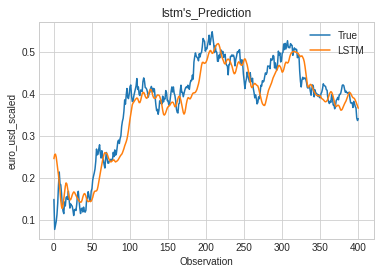

In [142]:
plt.plot(y_test, label='True')
plt.plot(predictions_lstm, label='LSTM')
plt.title("lstm's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()